<a href="https://colab.research.google.com/github/Ellen-Tuane/INPE_CAP417_Computational_Statistics/blob/main/CAP417_Hands_on_7_Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP-417-3: Computational Statistics

Hands On 07

Prof. Valdivino Alexandre de Santiago Júnior

Ellen Tuane

Subject: Kernel Density Estimation [1]

# 0. Import labraries and clone dataset repo

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
! git clone https://github.com/vsantjr/CAP.git

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import collections as matcoll
import seaborn as sns
import numpy as np
import math
from skimage.io import imread, imshow
import os
import cv2
import glob
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# 1. Read/open the images. 


In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
! unzip /content/CAP/CAP417/Images/imgsmall.zip -d /content/images

Archive:  /content/CAP/CAP417/Images/imgsmall.zip
replace /content/images/ILSVRC2012_val_00002034.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Load and resize all images to the same size

In [5]:
img_path = '/content/images/'

In [6]:
images_original = []
for img in os.listdir(img_path):
    img = cv2.imread(os.path.join(img_path, img))
    resized = cv2.resize(img, (100,100))
    images_original.append(resized)

Plot resized images


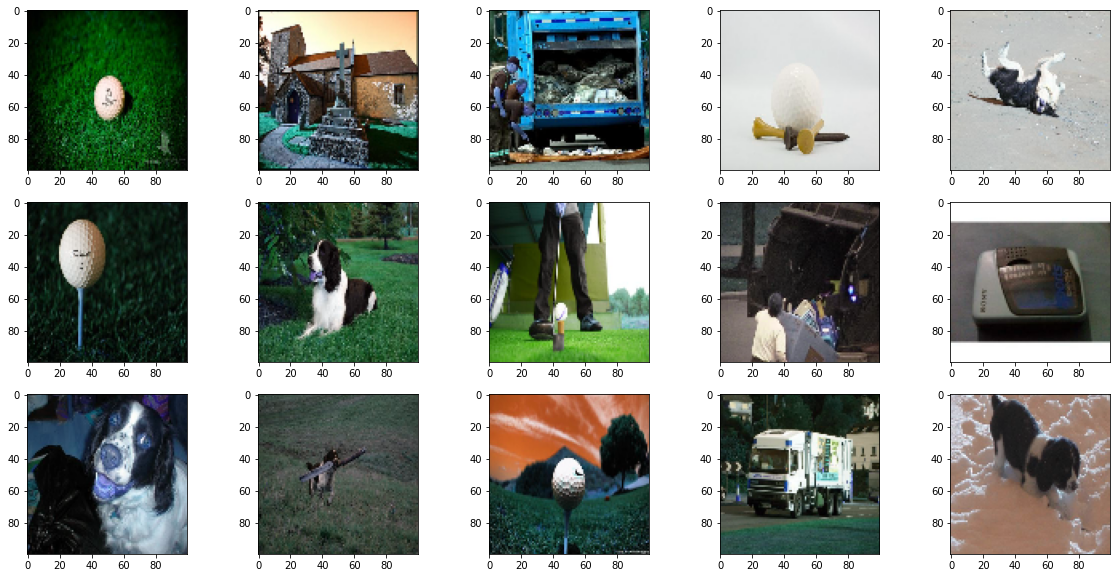

In [27]:
plt.figure(figsize=(20,10))
#i=0
for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.imshow(images_original[i])
plt.show()

# 2. Select image features. Image features are important to represent each image. Select at least two of these features.

In [7]:
# Reading images and extracting features [3][4][5][6]
image_red = []
image_gray = []
image_edges = []
image_features = []

for img in images_original:
    
    #img = cv2.imread(img_resized)
   
    if(img is not None):
        #convert the image to RGB (images are read in BGR in OpenCV)
        colors = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        (R,G,B) = cv2.split(colors)
        #R = R.flatten()
        image_red.append(R)

        # no color needed to detect edges
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image_gray.append(gray)
        

        # GaussianBlur to reduce the noise in the image
        blur = cv2.GaussianBlur(gray,(3,3), 0)
        # extract edges
        edges = cv2.Sobel(blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
        image_edges.append(edges)

        image_features.append(R)
        image_features.append(gray)
        #image_features.append(edges)
        

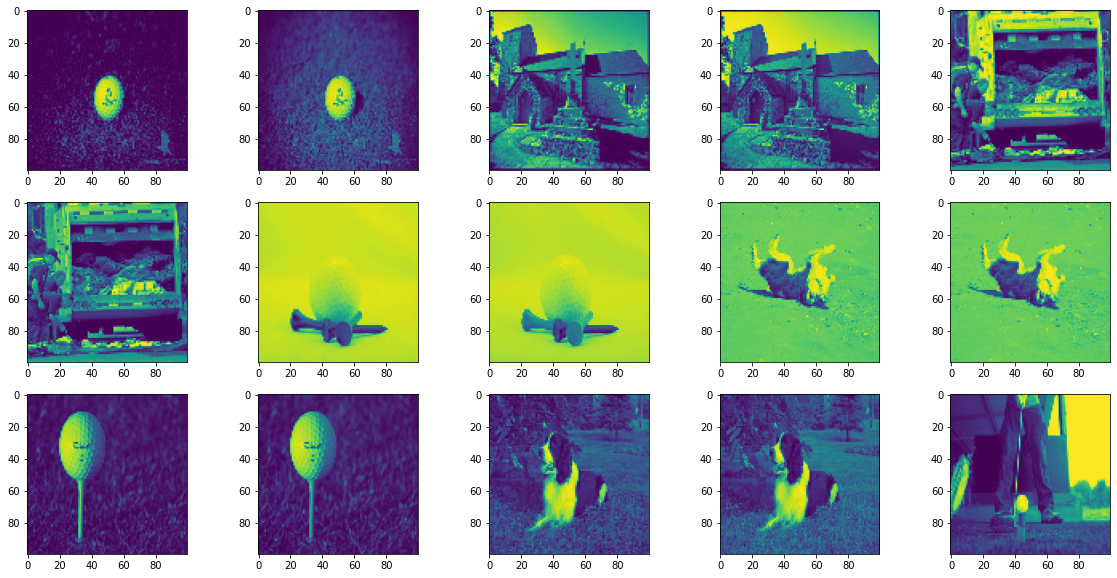

In [29]:
plt.figure(figsize=(20,10))
#i=0
for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.imshow(image_features[i])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


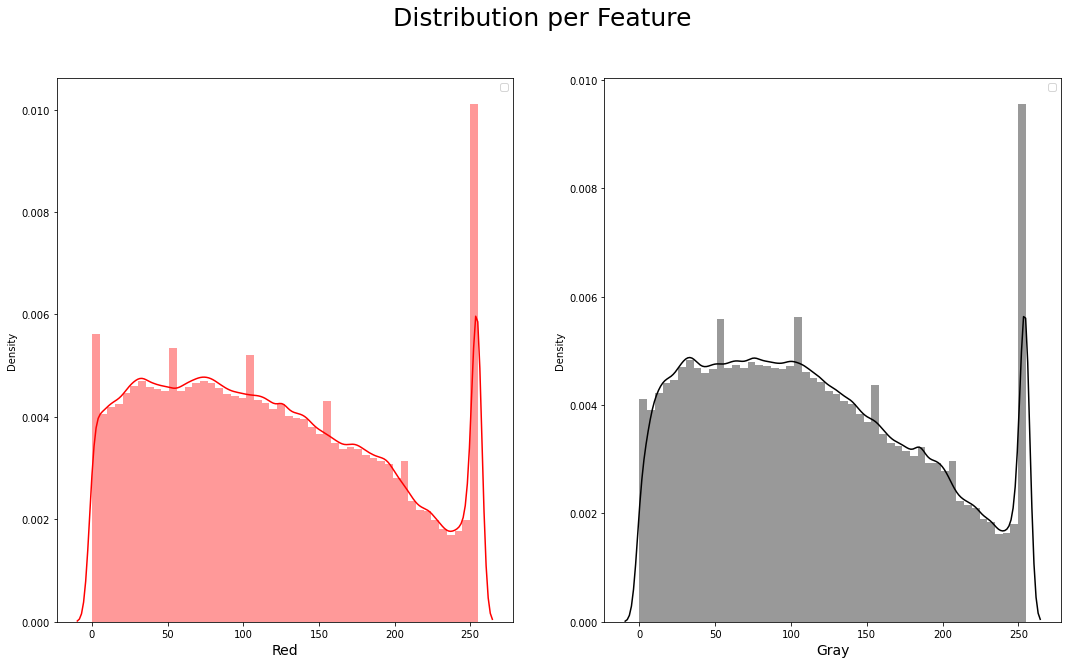

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribution per Feature', size=25)

# set data
sns.distplot(image_red, ax=axs[0], kde=True,color='r')
axs[0].set_xlabel("Red", size=14)
axs[0].legend()

sns.distplot(image_gray, ax=axs[1], kde=True,color='k')
axs[1].set_xlabel("Gray", size=14)
axs[1].legend()

# set title
plt.legend()
plt.show()

# 2.2 Struturing the dataset to fit GMM

# 2.2.1 All Feature matrix

* flatten every feature in image features
* reshaped

In [9]:
image_feature_2 = []

In [10]:
for feature in image_features:
    f = feature.flatten(order='C')
    f = f.astype('i')
    image_feature_2.append(f)

image_feature_2 = np.reshape(image_feature_2, (-1,1000))
image_feature_2[0].shape

(1000,)

In [11]:
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=2).fit(image_feature_2)
labels2 = gmm2.predict(image_feature_2)

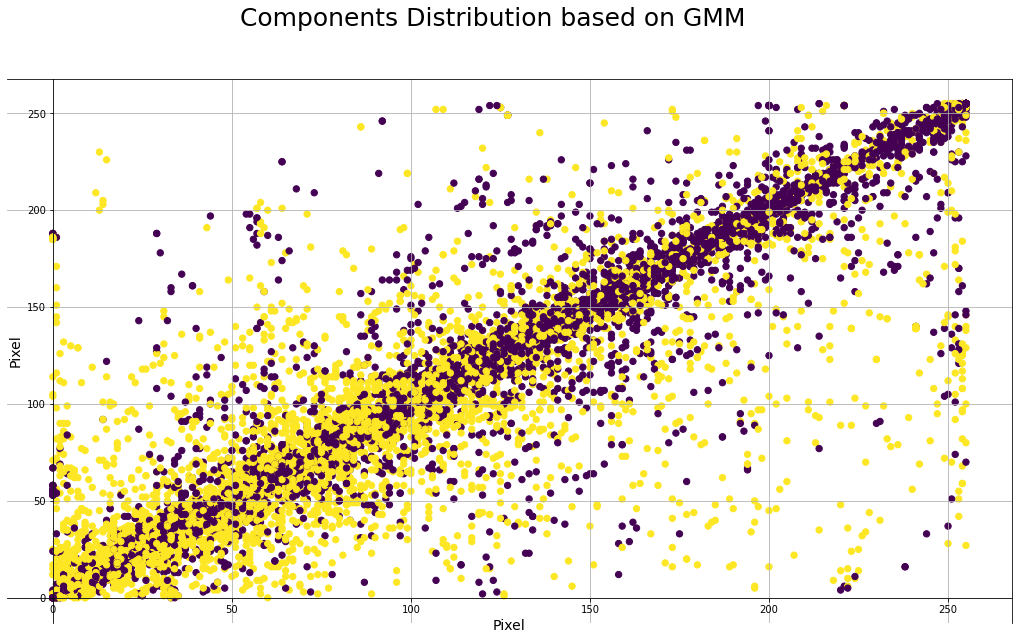

In [10]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))
fig.suptitle('Components Distribution based on GMM', size=25)

#data
axs.scatter(image_feature_2[:, 0], image_feature_2[:, 1], c=labels2,s=40)

#Create labels 
axs.set_xlabel('Pixel', size=14)
axs.set_ylabel('Pixel', size=14)
axs.spines['bottom'].set_position('zero')
axs.spines['left'].set_position('zero')

# set title
plt.title(' ', pad=30, size=25)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


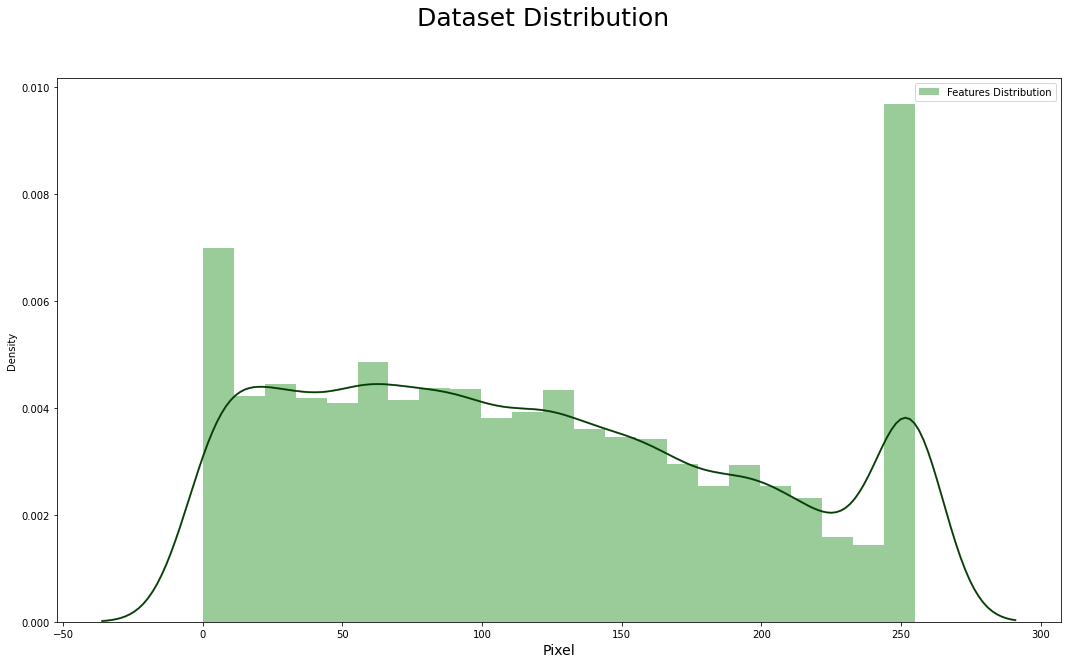

In [11]:
fig, axs = plt.subplots(figsize=(18, 10))
fig.suptitle('Dataset Distribution', size=25)
# set data
axs = sns.distplot(image_feature_2[:,0], label="Features Distribution", color="g")
axs = sns.kdeplot(image_feature_2[:,0], common_grid=True, color='black', alpha=0.5, linewidth=2)
#axs.plot(kde.support, kde.density, "--",lw=3, label="KDE as PDF", zorder=10)

#Create labels 
axs.set_xlabel('Pixel', size=14)
axs.spines['bottom'].set_position('zero')
#axs.spines['left'].set_position('zero')

# set title
plt.title('', pad=30, size=25)
plt.legend()
plt.show()

In [30]:
# diviting into clusters
cluster_2 = []
cluster_3 = []

for fl in range(len(labels2)):
    if labels2[fl] == 0:
        cluster_2.append(image_feature_2[fl].astype('double'))
    else:
        cluster_3.append(image_feature_2[fl].astype('double'))

In [31]:
len(cluster_2), len(cluster_3)

(5851, 6149)

In [32]:
# Calculating pdf as kde
kde_cluster_2 = sm.nonparametric.KDEUnivariate(cluster_2)
kde_cluster_2.fit()

kde_cluster_3 = sm.nonparametric.KDEUnivariate(cluster_3)
kde_cluster_3.fit()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


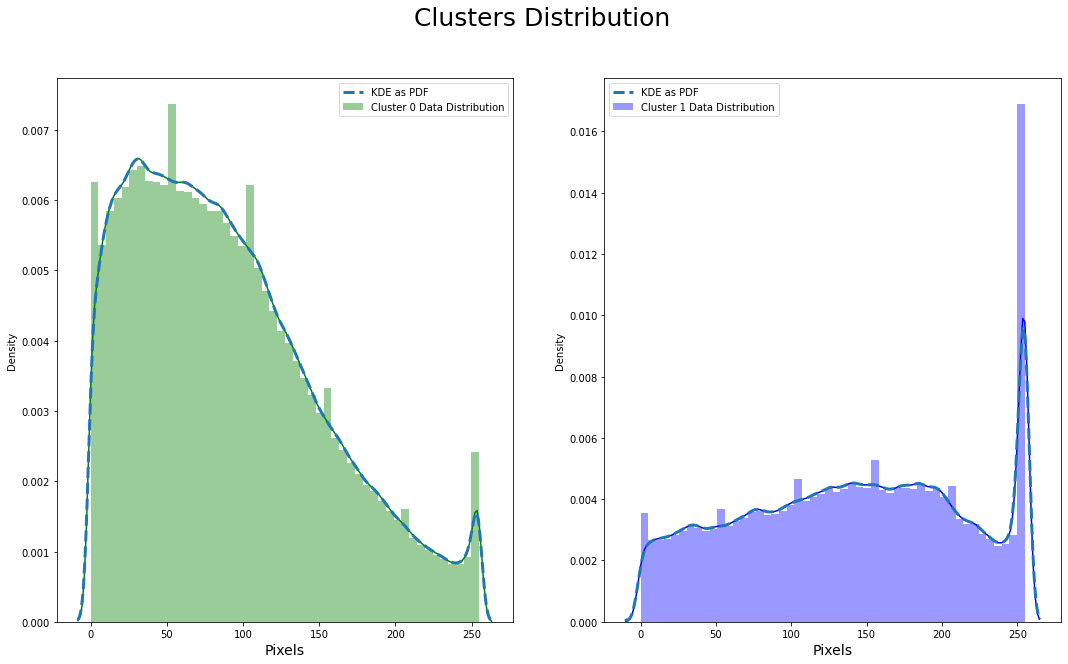

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Clusters Distribution', size=25)

# set data
sns.distplot(cluster_2, ax=axs[0], kde=True,color='g', label="Cluster 0 Data Distribution")
#sns.kdeplot(cluster_0, ax=axs[0], label="True Distribution", common_grid=True, color='black', alpha=0.5, linewidth=2)
axs[0].plot(kde_cluster_2.support, kde_cluster_2.density, "--",lw=3, label="KDE as PDF", zorder=10)
axs[0].set_xlabel("Pixels", size=14)
axs[0].legend()

sns.distplot(cluster_3, ax=axs[1], kde=True,color='b', label="Cluster 1 Data Distribution")
#sns.kdeplot(cluster_1, ax=axs[1], label="True Distribution", common_grid=True, color='black', alpha=0.5, linewidth=2)
axs[1].plot(kde_cluster_3.support, kde_cluster_3.density, "--",lw=3, label="KDE as PDF", zorder=10)
axs[1].set_xlabel("Pixels", size=14)
axs[1].legend()

# set title
plt.legend()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Clusters Bandwidth Analisys')

my_colors = ['b', 'g', 'y', 'm', 'r', 'w']
bandwidth = [0.1, 0.2, 0.4, 0.7, 1, 1.8]

for i in range(len(bandwidth)):
    sns.histplot(cluster_2, ax=axs[0],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(cluster_2, ax=axs[0], stat='probability', kde=True, color='k', alpha=0.2, legend=True)
plt.legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])
axs[0].set_xlabel("Cluster 0", size=14)
axs[0].legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])

for i in range(len(bandwidth)):
    sns.histplot(cluster_3, ax=axs[1],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(cluster_3, ax=axs[1], stat='probability', kde=True, color='k', alpha=0.2, legend=True)
plt.legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])
axs[1].set_xlabel("Cluster 1", size=14)
axs[1].legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])

plt.show()

# 2.2.2 calculated matrix mean for each img
* Flatten every feature in image_feature
* calculated mean of every feature
* appended into image_feature 3

In [12]:
image_feature_3 = []

In [13]:
for feature in image_features:
    f = feature.flatten(order='C')
    f = int(f.mean())
    #f = f.astype('i')
    image_feature_3.append(f)

image_feature_3 = np.reshape(image_feature_3, (-1,2))
image_feature_3.shape

(600, 2)

grouped every two means

In [ ]:
image_feature_3

trainning the model

In [15]:
from sklearn.mixture import GaussianMixture
gmm3 = GaussianMixture(n_components=2).fit(image_feature_3)
labels3 = gmm3.predict(image_feature_3)

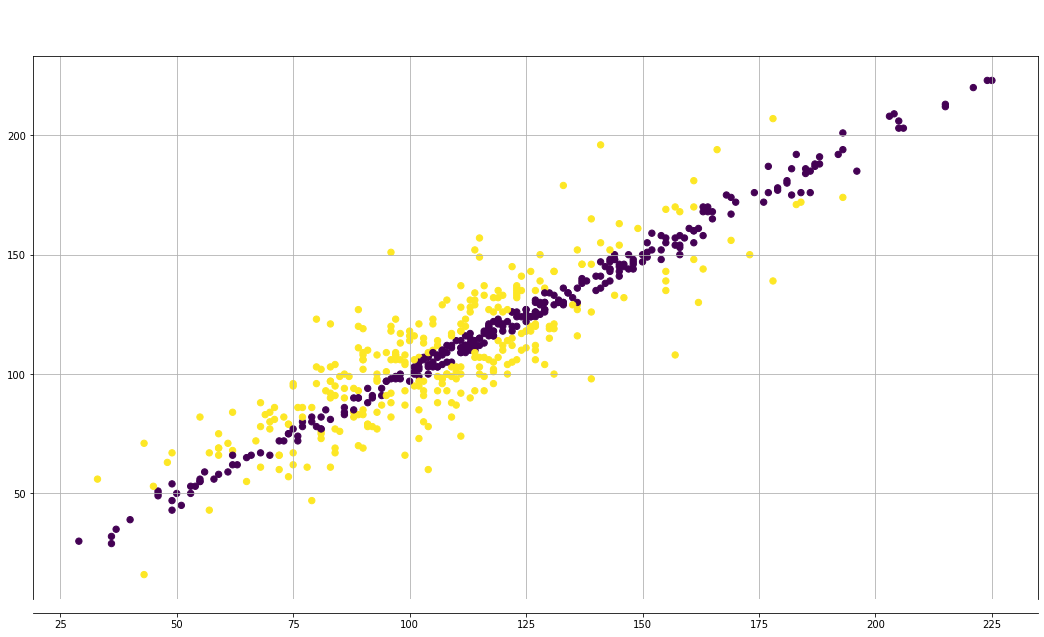

In [16]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

axs.scatter(image_feature_3[:, 1], image_feature_3[:, 0], c=labels3,s=40)
#axs.hist(image_feature_3)

#Create labels 
axs.set_xlabel('', size=14)
axs.set_ylabel('', size=14)
axs.spines['bottom'].set_position('zero')

# set title
plt.title(' ', pad=30, size=25)
plt.grid()
plt.show()

# 2.2.3 calculated matrix mean for each img and added a identification number

* Flatten every feature in image_feature
* calculated mean of every feature
* appended into image_feature 3 adding a number relating to feature number

In [17]:
image_feature_4 = []

In [ ]:
i = 1
for feature in image_features:
    f = feature.flatten(order='C')
    f = int(f.mean())
    image_feature_4.append([f, i])
    i += 1

image_feature_4 = np.reshape(image_feature_4, (-1,2))
image_feature_4

In [19]:
from sklearn.mixture import GaussianMixture
gmm4 = GaussianMixture(n_components=2, covariance_type='diag').fit(image_feature_4)
labels4 = gmm4.predict(image_feature_4)

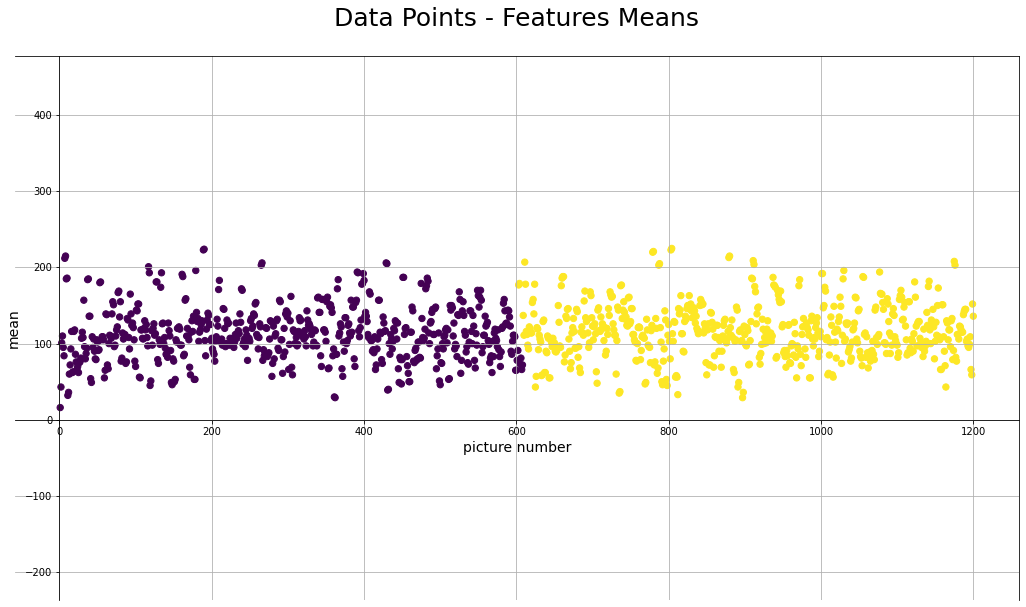

In [20]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

axs.scatter(image_feature_4[:, 1], image_feature_4[:, 0], c=labels4,s=40)

#Create labels 
axs.set_ylim(0, 300)
axs.set_xlabel('picture number', size=14)
axs.set_ylabel('mean', size=14)
axs.spines['bottom'].set_position('zero')
axs.spines['left'].set_position('zero')
axs.axis('equal')

# set title
plt.title('Data Points - Features Means', pad=30, size=25)
plt.grid()
plt.show()

# 3. Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item;

Solved with item 2

# 4. Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?

Using dataset from item 2.2.3 to solve this item

adding together feature and respective labels in one variable

In [21]:
features_labels = []
for a in range(len(image_feature_4)):
    features_labels.append([image_feature_4[a][0], labels4[a]])

cluster_0 = []
cluster_1 = []
for fl in range(1200):
    if features_labels[fl][1] == 0:
        cluster_0.append(features_labels[fl][0].astype('double'))
    else:
        cluster_1.append(features_labels[fl][0].astype('double'))


univariate kernel density estimator using KDEUnivariate to calculate PDF

In [22]:
kde_cluster_0 = sm.nonparametric.KDEUnivariate(cluster_0)
kde_cluster_0.fit()

kde_cluster_1 = sm.nonparametric.KDEUnivariate(cluster_1)
kde_cluster_1.fit()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


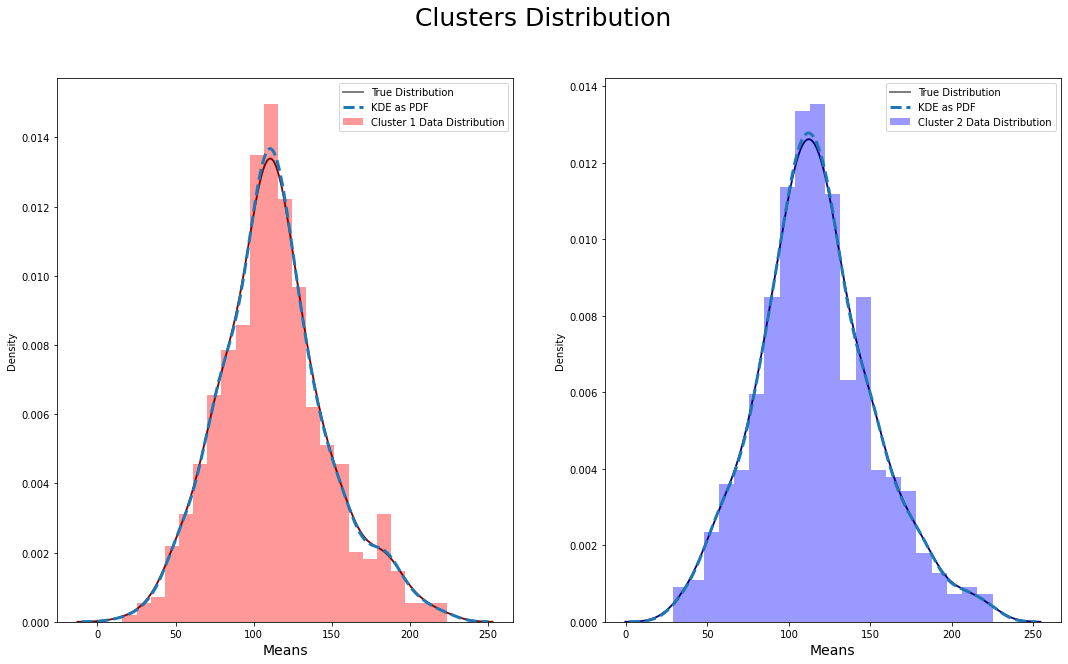

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Clusters Distribution', size=25)

# set data
sns.distplot(cluster_0, ax=axs[0], kde=True,color='r', label="Cluster 1 Data Distribution")
sns.kdeplot(cluster_0, ax=axs[0], label="True Distribution", common_grid=True, color='black', alpha=0.5, linewidth=2)
axs[0].plot(kde_cluster_0.support, kde_cluster_0.density, "--",lw=3, label="KDE as PDF", zorder=10)
axs[0].set_xlabel("Means", size=14)
axs[0].legend()

sns.distplot(cluster_1, ax=axs[1], kde=True,color='b', label="Cluster 2 Data Distribution")
sns.kdeplot(cluster_1, ax=axs[1], label="True Distribution", common_grid=True, color='black', alpha=0.5, linewidth=2)
axs[1].plot(kde_cluster_1.support, kde_cluster_1.density, "--",lw=3, label="KDE as PDF", zorder=10)
axs[1].set_xlabel("Means", size=14)
axs[1].legend()

# set title
plt.legend()
plt.show()

Variating Bandwidth  0.1, 0.2, 0.4, 0.7, 1, 1.8

---



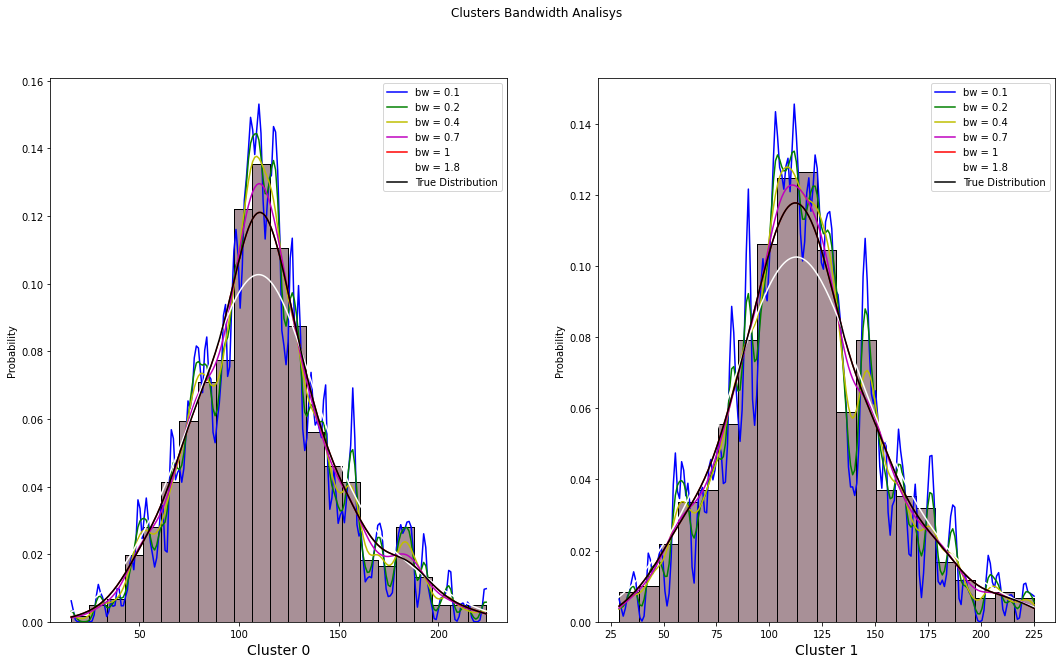

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Clusters Bandwidth Analisys')

my_colors = ['b', 'g', 'y', 'm', 'r', 'w']
bandwidth = [0.1, 0.2, 0.4, 0.7, 1, 1.8]

for i in range(len(bandwidth)):
    sns.histplot(cluster_0, ax=axs[0],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(cluster_0, ax=axs[0], stat='probability', kde=True, color='k', alpha=0.2, legend=True)
plt.legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])
axs[0].set_xlabel("Cluster 0", size=14)
axs[0].legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])

for i in range(len(bandwidth)):
    sns.histplot(cluster_1, ax=axs[1],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(cluster_1, ax=axs[1], stat='probability', kde=True, color='k', alpha=0.2, legend=True)
plt.legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])
axs[1].set_xlabel("Cluster 1", size=14)
axs[1].legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])

plt.show()

# 5. Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?

In [25]:
kde_image_features = []
for k in image_feature_4:
    kde_image_features.append(k[0].astype('double'))
#kde_image_features = np.array(kde_image_features)

In [26]:
kde = sm.nonparametric.KDEUnivariate(kde_image_features)
kde.fit()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


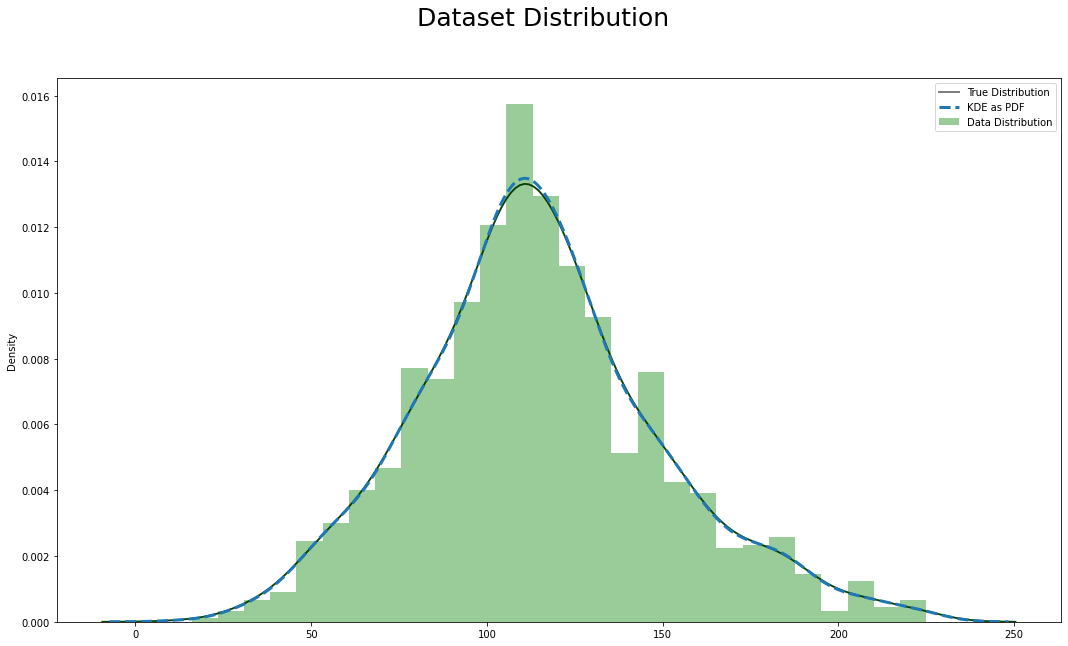

In [27]:
fig, axs = plt.subplots(figsize=(18, 10))
fig.suptitle('Dataset Distribution', size=25)
# set data
axs = sns.distplot(image_feature_4[:,0], label="Data Distribution", color="g")
axs = sns.kdeplot(image_feature_4[:,0], label="True Distribution", common_grid=True, color='black', alpha=0.5, linewidth=2)
axs.plot(kde.support, kde.density, "--",lw=3, label="KDE as PDF", zorder=10)

# set title
plt.title('', pad=30, size=25)
plt.legend()
plt.show()


Variating Bandwidth  0.1, 0.2, 0.4, 0.7, 1, 1.8

---



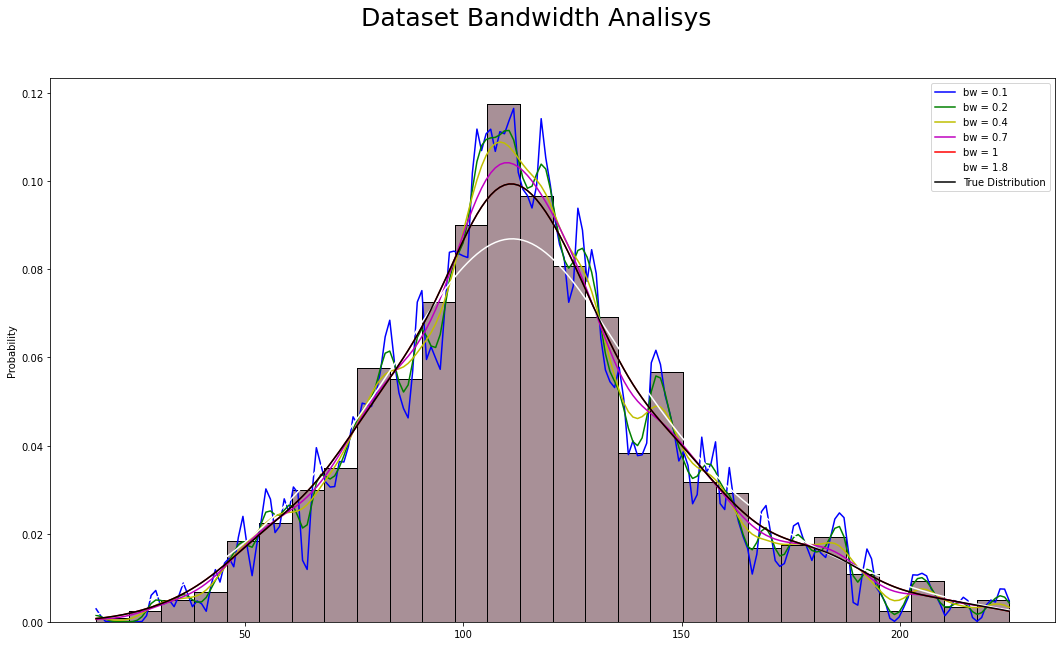

In [28]:
fig, axs = plt.subplots(figsize=(18, 10))
fig.suptitle("Dataset Bandwidth Analisys", size=25)

my_colors = ['b', 'g', 'y', 'm', 'r', 'w']
bandwidth = [0.1, 0.2, 0.4, 0.7, 1, 1.8]

for i in range(len(bandwidth)):
    sns.histplot(image_feature_4[:,0], stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
    
sns.histplot(image_feature_4[:,0], stat='probability', kde=True, color='k', alpha=0.2, legend=True)
plt.legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])

# set title
plt.title('', pad=30, size=25)
plt.show()


# References:

[1] Kernel Density Estimation. Available at: https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A05.ipynb. Accessed on: May 3, 22.

[2] V. A. Santiago Júnior. CAP-417: Estatística Computacional (Computational Statistics), 2022. Acessed on: Abr 22, 22. Available at: https://github.com/vsantjr/CAP/tree/master/CAP417.

[3] 3 Beginner-Friendly Techniques to Extract Features from Image Data using Python. Analytics Vidhya, 2019. Available at: https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/. Accessed on: May 3, 22.

[4] OpenCV Smoothing and Blurring. PyImageSearch, 2021. Available at:https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/. Accessed on: May 3, 22.

[5] Understanding the concept of Channels in an Image. Medium, 2021. Available at: https://medium.com/featurepreneur/understanding-the-concept-of-channels-in-an-image-6d59d4dafaa9. Accessed on: May 3, 22.

[6] Edge Detection Using OpenCV. LearnOpenCV. Available at: https://learnopencv.com/edge-detection-using-opencv/. Accessed on: May 3, 22.